## Lab V: KNN
### Rebecca Vanni - ecn2wh

Questions:
1. Use the question/target variable you submitted and 
build a model to answer the question you created for this dataset (make sure it is a classification problem, convert if necessary). 

2. Build a kNN model to predict your target variable using 3 nearest neighbors. Make sure it is a classification problem, meaning
if needed changed the target variable.

3. Create a dataframe that includes the test target values, test predicted values, 
and test probabilities of the positive class.

4. No code question: If you adjusted the k hyperparameter what do you think would
happen to the threshold function? Would the confusion look the same at the same threshold 
levels or not? Why or why not?

5. Evaluate the results using the confusion matrix. Then "walk" through your question, summarize what 
concerns or positive elements do you have about the model as it relates to your question? 

6. Create two functions: One that cleans the data & splits into training|test and one that 
allows you to train and test the model with different k and threshold values, then use them to 
optimize your model (test your model with several k and threshold combinations). Try not to use variable names 
in the functions, but if you need to that's fine. (If you can't get the k function and threshold function to work in one
function just run them separately.) 

7. How well does the model perform? Did the interaction of the adjusted thresholds and k values help the model? Why or why not? 

8. Choose another variable as the target in the dataset and create another kNN model using the two functions you created in
step 7. 

In [75]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.neighbors import KNeighborsClassifier


### Question One
Use the question/target variable you submitted and build a model to answer the question you created for this dataset (make sure it is a classification problem, convert if necessary). 

In [30]:
# Question from other lab: How to predict a public university's aid? - choice are low amount of aid or high

#Cleaning and setting up data
college_data = pd.read_csv('/workspaces/DS-3021/data/cc_institution_details.csv')
college_data['control'] = college_data['control'].apply(lambda x: 'Private' if 'Private' in x else 'Public')

target = college_data['aid_value']

relevant_columns = ["chronname","state","control","basic","aid_value","ft_pct", "retain_value", "grad_100_value","grad_150_value", "cohort_size"]

# Filter and convert data set
df= college_data[college_data["control"] == "Public"][relevant_columns]
num_cols = ["aid_value", "ft_pct", "retain_value", "grad_100_value", "grad_150_value", "cohort_size"]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")

#Drop na
df_cleaned = df.dropna()

#making classification by creating binds for the aid type, dividing into 2, making 0, 1, (low or high aid), and same size
binner = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#applying to aid
df_cleaned.loc[:, "aid_category"] = binner.fit_transform(df_cleaned[["aid_value"]]).astype(int)
df_cleaned.head()


/tmp/ipykernel_623/4090155886.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.loc[:, "aid_category"] = binner.fit_transform(df_cleaned[["aid_value"]]).astype(int)


,chronname,state,control,basic,aid_value,ft_pct,retain_value,grad_100_value,grad_150_value,cohort_size,aid_category
0,Alabama A&M University,Alabama,Public,Masters Colleges and Universities--larger prog...,7142.0,93.8,63.1,10.0,29.1,882.0,1
1,University of Alabama at Birmingham,Alabama,Public,Research Universities--very high research acti...,6088.0,72.7,80.2,29.4,53.5,1376.0,0
3,University of Alabama at Huntsville,Alabama,Public,Research Universities--very high research acti...,6647.0,74.4,81.0,16.5,48.4,759.0,1
4,Alabama State University,Alabama,Public,Masters Colleges and Universities--larger prog...,7256.0,91.0,62.2,8.8,25.2,1351.0,1
5,University of Alabama at Tuscaloosa,Alabama,Public,Research Universities--high research activity,10390.0,90.2,87.0,42.7,66.7,4438.0,1


### Question Two
Build a kNN model to predict your target variable using 3 nearest neighbors. Make sure it is a classification problem, meaning
if needed changed the target variable.

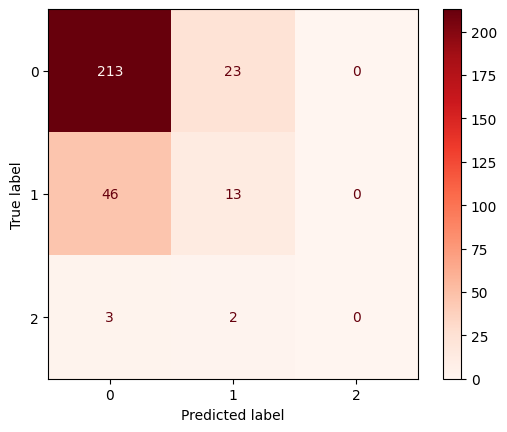

In [31]:


# Define features and target variable
features = ["ft_pct", "retain_value", "grad_100_value", "grad_150_value", "cohort_size"]
X = df_cleaned[features]
y = df_cleaned["aid_category"]

#split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#train, neighbors =3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

#predict
knn.score(X_test, y_test)
X_val = X_test
y_val = y_test
knn.score(X_val, y_val)

#evaluate 
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val, cmap='Reds')
plt.show()

### Question Three
Create a data frame that includes the test target values, test predicted values,and test probabilities of the positive class.

In [32]:

# get the positive probabilities 
y_prob = knn.predict_proba(X_test)[:, 1]

# creating the df
result_df = pd.DataFrame({'y_test': y_test,'y_pred': y_pred,'y_prob': y_prob})
print(result_df.head(10))

      y_test  y_pred    y_prob
1456       0       1  0.666667
1834       0       0  0.333333
915        0       0  0.000000
121        1       1  1.000000
2619       1       0  0.000000
2665       0       0  0.000000
2043       1       0  0.000000
360        0       0  0.000000
1204       0       0  0.000000
2970       1       0  0.000000


### Question Four
No code question: If you adjusted the k hyperparameter what do you think would happen to the threshold function? Would the confusion look the same at the same threshold levels or not? Why or why not?

I think the threshold function would become smoother and be less complex more general. As the function bases its classification on wider trends rather then the specific points near by. The confusion would not look the same at threshold levels. This is because the model is becoming less specific, fewer extreme incorrect classifications. But there would be reduced specificity, making the model closer to overfitting. 

### Question Five
Evaluate the results using the confusion matrix. Then "walk" through your question, summarize what concerns or positive elements do you have about the model as it relates to your question? 

My question was "Can we predict the level of aid (low, medium high) that a public university will provide based on their retention rate, student body size, graduation rate, and state?" Aid was used as the target for classification, with three bins of low, medium, and high aid. Some issues that could be in the model are the amount in each class. The model did well in low classification, and not as well for medium. While the high class didn't have as many instances which prevented the model from being as successful predicting. Some of the features chosen like retention could not contribute to aid as much which creates noise for the model. Also could adjust k to get a better model evaluation. Finally, a positive element would be the model had a good accuracy of 75% which suggest a correlation. 


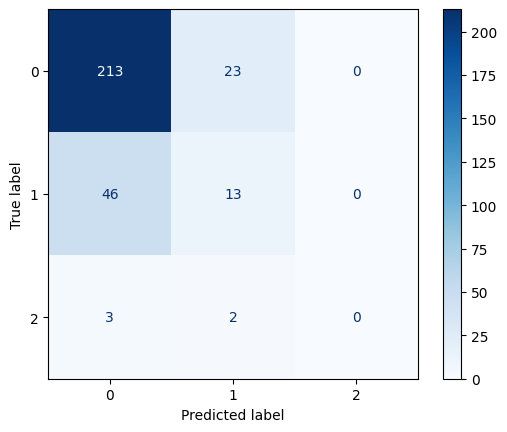

0.7533333333333333


In [33]:
ConfusionMatrixDisplay.from_estimator(knn, X_val, y_val, cmap='Blues')
plt.show()

score = knn.score(X_val, y_val)
print(score)


### Question Six
Create two functions: One that cleans the data & splits into training|test and one that allows you to train and test the model with different k and threshold values, then use them to optimize your model (test your model with several k and threshold combinations). Try not to use variable names in the functions, but if you need to that's fine. (If you can't get the k function and threshold function to work in one function just run them separately.) 

In [78]:
#df = data frame
#target = string that relates to a column name that will be used as target for classification
#features = what are being used to predict what the target will be (other column names)
#test = test size, 80 20 train test split
#num_bins, how the target variables will be split (3 bins)

def clean_data(df, target, features, test_size=0.2, num_bins=3):
    # normalizing the numerical features
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    # make target into classification variable
    binner = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
    df["target"] = binner.fit_transform(df[[target]]).astype(int)
    # split the data
    X = df[features]
    y = df["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    return X_train, X_test, y_train, y_test

# This function will allow different k and threshold values
def train_test_knn(X_train, X_test, y_train, y_test, k_values):
    #creating a dictionary for the values to be stored in for each k
    results = {}
    cv_scores = []
    #for loop that goes through the k values increasing until reach last k of k_values
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
        cv_scores.append(scores.mean())
        knn.fit(X_train, y_train)
        #creating the results which is the score
        accu = knn.score(X_test, y_test)
        results[k] = accu
        
    return results, cv_scores


#setting up data for the function
relevant_columns = ["chronname", "state", "control", "basic", "aid_value", "ft_pct", "retain_value", "grad_100_value", "grad_150_value", "cohort_size"]
df_cleaned = df[df["control"] == "Public"][relevant_columns]
df_cleaned = df_cleaned.dropna()
num_cols = ["aid_value", "ft_pct", "retain_value", "grad_100_value", "grad_150_value", "cohort_size"]

# Define features for the model
features = ["ft_pct", "retain_value", "grad_100_value", "grad_150_value", "cohort_size"]
target = "aid_value"

# Clean and use function
X_train, X_test, y_train, y_test = clean_data(df_cleaned, target, features)

# getting the results of the model
k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
results,cv_scores = train_test_knn(X_train, X_test, y_train, y_test, k_values)

# finding the best preforming k
best_k = k_values[np.argmax(cv_scores)]
best_accuracy = max(cv_scores)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(f"The best k is: {best_k}")
print(f"Test set accuracy with best k: {test_accuracy:.2%}")


The best k is: 19
Test set accuracy with best k: 81.67%


### Question Seven
How well does the model perform? Did the interaction of the adjusted thresholds and k values help the model? Why or why not?

The model preforms pretty well. Ending up with a maximum accuracy of 81.67%. The k value best is 19. Yes the interaction of adjusted thresholds and k values helped the model as the accuracy went from 75% to 81.67% therefore making it better equipped to calculate the groups. Class 0 is very well classified with this model. At k=7 the model is better able to generalize and ignore the noise. Could still preform better with the other classifications (1 and 2). But overall did very well. 

### Question Eight
Choose another variable as the target in the dataset and create another kNN model using the two functions you created in
step 7.

In [ ]:
#Question: Is a university public or private based on the number of students, aid provided, graduation rate, state.
#new target variable is public vs private university 
#features: 

df["control"] = df["control"].apply(lambda x: "Private" if "Private" in x else "Public")
relevant_columns = ["chronname", "state", "control", "basic", "aid_value", "ft_pct", "retain_value", "grad_100_value", "grad_150_value", "cohort_size"]
df_cleaned = df[relevant_columns].dropna()
df_cleaned["control"] = df_cleaned["control"].map({"Private": 1, "Public": 0})

# function without bins
def clean_data_2(df, target, features, test_size=0.2):
    scaler = MinMaxScaler()
    df[features] = scaler.fit_transform(df[features])
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)
    
    return X_train, X_test, y_train, y_test

features = ["ft_pct", "retain_value", "grad_100_value", "grad_150_value", "cohort_size", "aid_value"]
target = "control"
X_train, X_test, y_train, y_test = clean_data_2(df_cleaned, target, features)
k_values = list(range(1, 21))  # Test k from 1 to 20
results,cv_scores = train_test_knn(X_train, X_test, y_train, y_test, k_values)

# finding the best preforming k
best_k = k_values[np.argmax(cv_scores)]
best_accuracy = max(cv_scores)
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)
print(f"The best k is: {best_k}")
print(f"Test set accuracy with best k: {test_accuracy:.2%}")

#not sure if this model is working as well

The best k is: 1
Test set accuracy with best k: 100.00%
